# Support Vector Regression (SVR)

importing the libraries

In [1732]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

importing the dataset

In [1733]:
dataset = pd.read_csv('archive\insurance.csv')


Explore the data

In [1734]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1735]:
dataset.shape

(1338, 7)

In [1736]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1737]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


checking if there is missing value or not

In [1738]:
missing_total=dataset.isnull().sum()
print("Missing values in the dataset :")
print(missing_total)


Missing values in the dataset :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Classifying data manually

In [1739]:

dataset['sex']=dataset['sex'].map({'female':1 ,'male': 0}).astype(int)
dataset['smoker']=dataset['smoker'].map({'yes':1 ,'no': 0}).astype(int)

dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


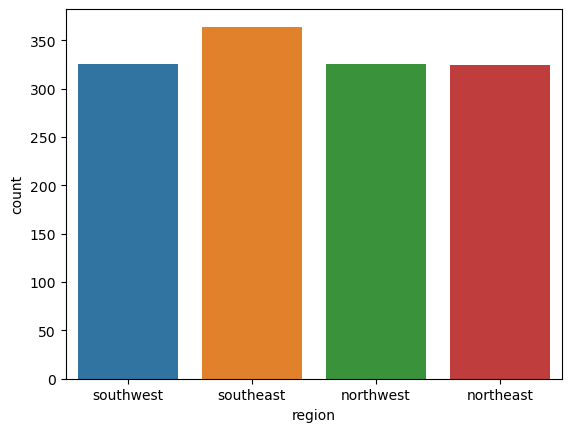

In [1740]:
sns.countplot(x=dataset['region'])
dataset['region']=dataset['region'].map({'southwest':0 ,'southeast' : 1,'northwest': 2, 'northeast': 3}).astype(int)



In [1741]:
dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [1742]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


Correlation features & output(charges)

Text(0, 0.5, 'charges')

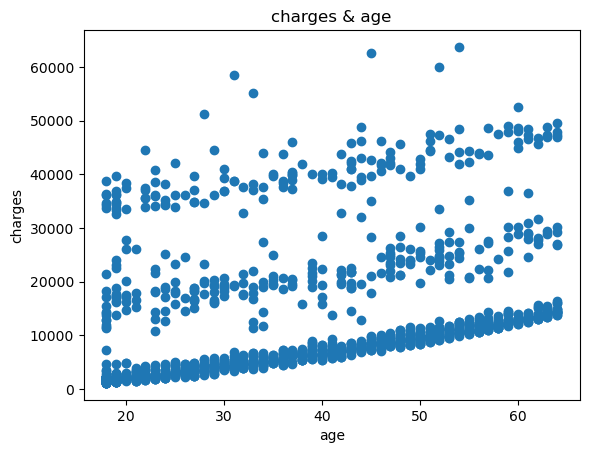

In [1743]:
plt.scatter(dataset.age , dataset.charges)
plt.title("charges & age")
plt.xlabel("age")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

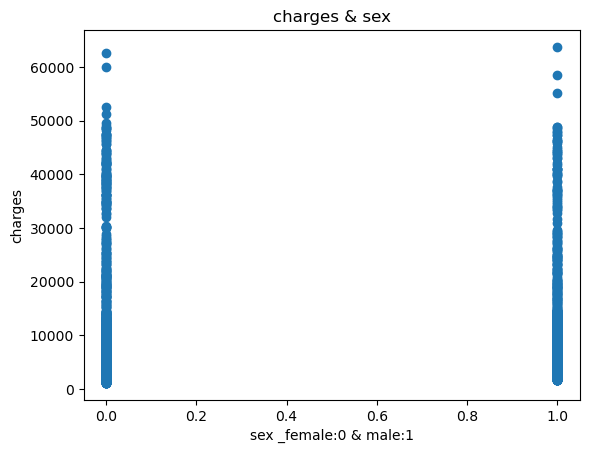

In [1744]:
plt.scatter(dataset.sex, dataset.charges)
plt.title("charges & sex")
plt.xlabel("sex _female:0 & male:1")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

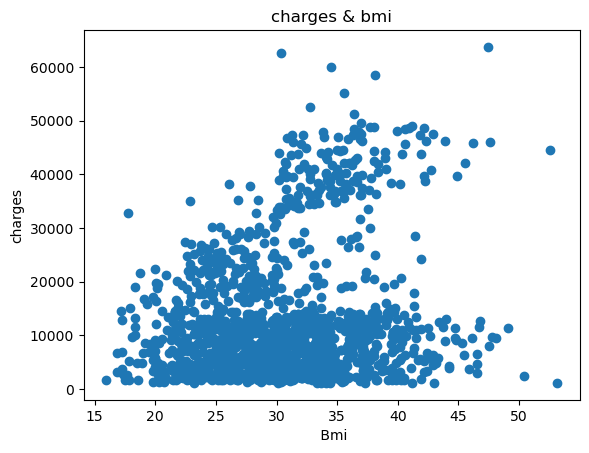

In [1745]:
plt.scatter(dataset.bmi, dataset.charges)
plt.title("charges & bmi")
plt.xlabel(" Bmi")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

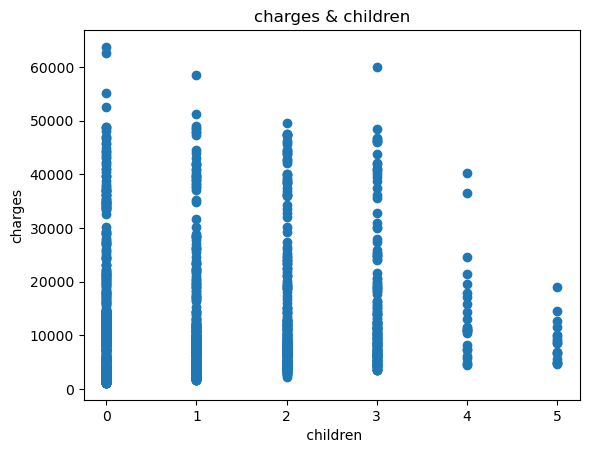

In [1746]:
plt.scatter(dataset.children, dataset.charges)
plt.title("charges & children")
plt.xlabel(" children")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

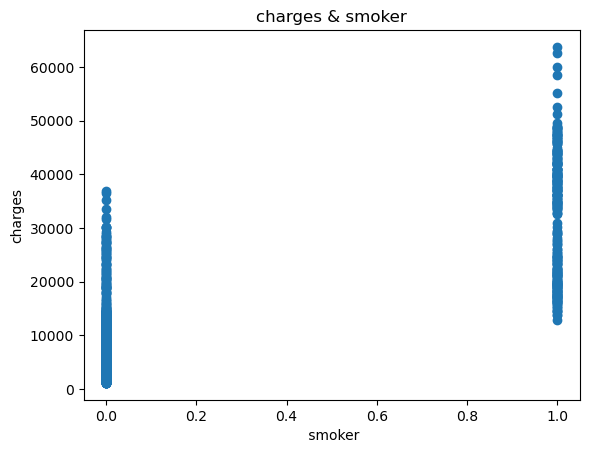

In [1747]:
plt.scatter(dataset.smoker, dataset.charges)
plt.title("charges & smoker")
plt.xlabel(" smoker")
plt.ylabel("charges")

Text(0, 0.5, 'charges')

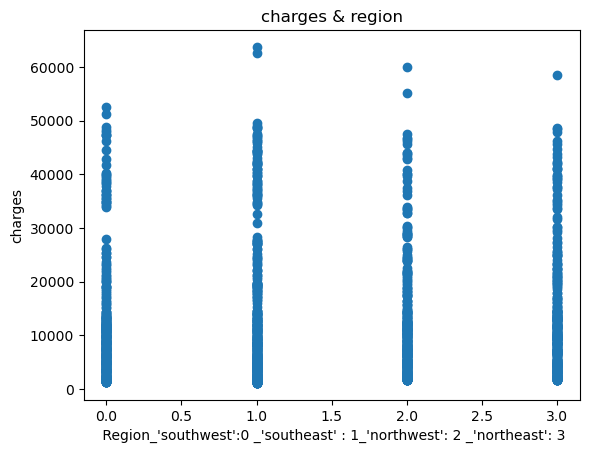

In [1748]:
plt.scatter(dataset.region, dataset.charges)
plt.title("charges & region")
plt.xlabel(" Region_'southwest':0 _'southeast' : 1_'northwest': 2 _'northeast': 3")
plt.ylabel("charges")

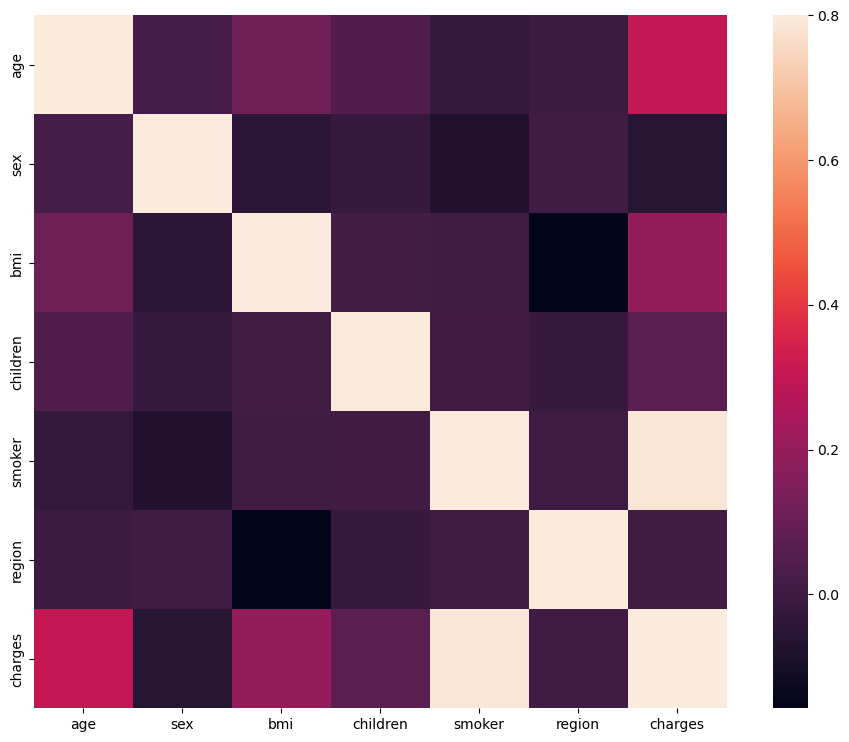

In [1749]:
corrmat=dataset.corr()
f, ax =plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True);

In [1750]:
dataset=dataset.drop(['sex','region'],axis=1)
dataset.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


In [1751]:
dataset.shape

(1338, 5)

sperate feature & label

In [1752]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)  ##to appear  as column

scaling  dataset

In [1753]:
from sklearn.preprocessing import StandardScaler
charges_scaled=StandardScaler()
y =charges_scaled.fit_transform(y)
x_sc= StandardScaler()
X =x_sc .fit_transform(X)
print(y)


[[ 0.2985838 ]
 [-0.95368917]
 [-0.72867467]
 ...
 [-0.96159623]
 [-0.93036151]
 [ 1.31105347]]


In [1754]:
print(X)

[[-1.43876426 -0.45332    -0.90861367  1.97058663]
 [-1.50996545  0.5096211  -0.07876719 -0.5074631 ]
 [-0.79795355  0.38330685  1.58092576 -0.5074631 ]
 ...
 [-1.50996545  1.0148781  -0.90861367 -0.5074631 ]
 [-1.29636188 -0.79781341 -0.90861367 -0.5074631 ]
 [ 1.55168573 -0.26138796 -0.90861367  1.97058663]]


## Training the SVR model on the whole dataset

In [1755]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train, y_test=train_test_split(X ,y, test_size=0.2 , random_state=0)

In [1756]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

c:\Users\Riadsoft\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Accurancy of test

In [1757]:
print("test score :", regressor.score(x_test,y_test))

test score : 0.8952261949999392


Predicting  new results

In [1758]:
y_pre=regressor.predict(x_test)
y_pre=charges_scaled.inverse_transform(y_test)
print(y_pre)


[[ 9724.53    ]
 [ 8547.6913  ]
 [45702.02235 ]
 [12950.0712  ]
 [ 9644.2525  ]
 [ 4500.33925 ]
 [ 2198.18985 ]
 [11436.73815 ]
 [ 7537.1639  ]
 [ 5425.02335 ]
 [ 6753.038   ]
 [10493.9458  ]
 [ 7337.748   ]
 [ 4185.0979  ]
 [18310.742   ]
 [10702.6424  ]
 [12523.6048  ]
 [ 3490.5491  ]
 [ 6457.8434  ]
 [33475.81715 ]
 [23967.38305 ]
 [12643.3778  ]
 [23045.56616 ]
 [23065.4207  ]
 [ 1674.6323  ]
 [ 4667.60765 ]
 [ 3732.6251  ]
 [ 7682.67    ]
 [ 3756.6216  ]
 [ 8413.46305 ]
 [ 8059.6791  ]
 [48970.2476  ]
 [12979.358   ]
 [20630.28351 ]
 [14571.8908  ]
 [ 4137.5227  ]
 [ 8347.1643  ]
 [51194.55914 ]
 [40003.33225 ]
 [ 1880.487   ]
 [ 5458.04645 ]
 [ 2867.1196  ]
 [20149.3229  ]
 [47496.49445 ]
 [36149.4835  ]
 [26018.95052 ]
 [19749.38338 ]
 [ 6940.90985 ]
 [ 4718.20355 ]
 [22192.43711 ]
 [ 2899.48935 ]
 [18838.70366 ]
 [23568.272   ]
 [46255.1125  ]
 [24227.33724 ]
 [ 3268.84665 ]
 [ 2322.6218  ]
 [ 8827.2099  ]
 [14478.33015 ]
 [13112.6048  ]
 [ 1253.936   ]
 [46718.16325 ]
 [13919.